<h1>Chicago Crimes</h1>
<hr>
<h2>Analyst: Kim David Penaredonda</h2>

<h1>Importing</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import folium
from folium.plugins import HeatMap
warnings.filterwarnings('ignore')

In [2]:
use_cols = [
    "Date", "Primary Type", "Description", "Location Description",
    "Arrest", "Domestic", "District", "Ward", 
    "Community Area", "FBI Code", "Latitude", "Longitude", 
    "Year"
]
ck = pd.read_csv('Chicago_Crimes.csv', usecols=use_cols, low_memory=False)

In [3]:
ck.head(10)

,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude
0,04/14/2024 12:00:00 AM,THEFT,FROM BUILDING,APARTMENT,False,False,2,3,38.0,06,2024,41.821236,-87.619921
1,04/14/2024 12:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,10,25,31.0,26,2024,41.852052,-87.683801
2,04/14/2024 12:00:00 AM,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,25,36,23.0,07,2024,41.907640,-87.735587
3,04/14/2024 12:00:00 AM,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,11,28,26.0,15,2024,41.877997,-87.724121
4,04/14/2024 12:00:00 AM,THEFT,FROM BUILDING,RESIDENCE,False,False,22,21,75.0,06,2024,41.689421,-87.650123
5,04/14/2024 12:00:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,3,20,40.0,08B,2024,41.780946,-87.621995
6,04/14/2024 12:00:00 AM,THEFT,OVER $500,RESIDENCE - PORCH / HALLWAY,False,False,20,40,77.0,06,2024,41.978617,-87.669681
7,04/14/2024 12:00:00 AM,ASSAULT,SIMPLE,RESTAURANT,False,False,25,36,19.0,08A,2024,41.930132,-87.785677
8,04/14/2024 12:00:00 AM,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,HOSPITAL BUILDING / GROUNDS,False,False,4,7,48.0,02,2024,41.726219,-87.567294
9,04/14/2024 12:00:00 AM,CRIMINAL TRESPASS,TO LAND,ATHLETIC CLUB,False,False,2,4,39.0,26,2024,41.809670,-87.594428


In [4]:
ck['Date'] = ck['Date'].astype('str')
ck['Date'] = pd.to_datetime(ck['Date'], dayfirst=True, errors = 'coerce')

In [5]:
ck['Year'] = ck['Date'].dt.year
ck['Month'] = ck['Date'].dt.month
ck['Day'] = ck['Date'].dt.day
ck['DayOfWeek'] = ck['Date'].dt.dayofweek
ck['HourOfDay'] = ck['Date'].dt.hour
ck['MinuteOfDay'] = ck["Date"].dt.minute

<h1>Converting Data Types</h1>

In [6]:
ck['Location Description'] = ck['Location Description'].fillna('unaccounted')
ck['District'] = ck['District'].fillna(ck['District'].mean())
ck['Ward'] = ck['Ward'].fillna(-1) # -1 represent as unknown ward
ck['Community Area'] = ck['Community Area'].fillna(-1) # -1 represent as unknown community area
ck['Latitude'] = ck['Latitude'].fillna(ck['Latitude'].mean())
ck['Longitude'] = ck['Longitude'].fillna(ck['Longitude'].mean())

In [7]:
ck['Description'] = ck['Description'].astype('category')
ck['Location Description'] = ck['Location Description'].astype('str')
ck['Community Area'] = ck['Community Area'].astype('float64')
ck['FBI Code'] = ck['FBI Code'].astype('category')
ck['Year'] = ck['Year'].astype('int16')
ck['Month'] = ck['Month'].astype('int16')
ck['Day'] = ck['Day'].astype('int8')
ck['DayOfWeek'] = ck['DayOfWeek'].astype('int8')
ck['HourOfDay'] = ck['HourOfDay'].astype('int8')
ck['MinuteOfDay'] = ck['MinuteOfDay'].astype('int8')

In [8]:
ck.dtypes

Date                    datetime64[ns]
Primary Type                    object
Description                   category
Location Description            object
Arrest                            bool
Domestic                          bool
District                         int64
Ward                             int64
Community Area                 float64
FBI Code                      category
Year                             int16
Latitude                       float64
Longitude                      float64
Month                            int16
Day                               int8
DayOfWeek                         int8
HourOfDay                         int8
MinuteOfDay                       int8
dtype: object

<h1>Preparing the dataset by filling in missing values and standardizing the data for consistency.</h1>

In [9]:
ck['Community Area'].unique()

array([38., 31., 23., 26., 75., 40., 77., 19., 48., 39., 29.,  8., 24.,
       25.,  3.,  6., 44., 45., 43., 49., 66., 54., 28.,  4., 33., 41.,
       12., 32., 27., 35., 63., 30., 69., 71., 14., 16., 59.,  1., 20.,
        7., 46., 58., 61., 53., 11., 36., 50., 67., 34., 17., 70., 51.,
       13., 65., 42.,  5., 56., 22., 68., 76., 57.,  2., 55., 73., 15.,
       64., 60., 21., 72., 18., 37., 62., 47., 74., 10., 52.,  9., -1.])

In [10]:
ck.isnull().sum()

Date                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
District                0
Ward                    0
Community Area          0
FBI Code                0
Year                    0
Latitude                0
Longitude               0
Month                   0
Day                     0
DayOfWeek               0
HourOfDay               0
MinuteOfDay             0
dtype: int64

<h1>Putting Community Names</h1>

In [11]:
community_map = {
    1: "Rogers Park",
    2: "West Ridge",
    3: "Uptown",
    4: "Lincoln Square",
    5: "North Center",
    6: "Lake View",
    7: "Lincoln Park",
    8: "Near North Side",
    9: "Edison Park",
    10: "Norwood Park",
    11: "Jefferson Park",
    12: "Forest Glen",
    13: "North Park",
    14: "Albany Park",
    15: "Portage Park",
    16: "Irving Park",
    17: "Dunning",
    18: "Montclare",
    19: "Belmont Cragin",
    20: "Hermosa",
    21: "Avondale",
    22: "Logan Square",
    23: "Humboldt Park",
    24: "West Town",
    25: "Austin",
    26: "West Garfield Park",
    27: "East Garfield Park",
    28: "Near West Side",
    29: "North Lawndale",
    30: "South Lawndale",
    31: "Lower West Side",
    32: "Loop",
    33: "Near South Side",
    34: "Armour Square",
    35: "Douglas",
    36: "Oakland",
    37: "Fuller Park",
    38: "Grand Boulevard",
    39: "Kenwood",
    40: "Washington Park",
    41: "Hyde Park",
    42: "Woodlawn",
    43: "South Shore",
    44: "Chatham",
    45: "Avalon Park",
    46: "South Chicago",
    47: "Burnside",
    48: "Calumet Heights",
    49: "Roseland",
    50: "Pullman",
    51: "South Deering",
    52: "East Side",
    53: "West Pullman",
    54: "Riverdale",
    55: "Hegewisch",
    56: "Garfield Ridge",
    57: "Archer Heights",
    58: "Brighton Park",
    59: "McKinley Park",
    60: "Bridgeport",
    61: "New City",
    62: "West Elsdon",
    63: "Gage Park",
    64: "Clearing",
    65: "West Lawn",
    66: "Chicago Lawn",
    67: "West Englewood",
    68: "Englewood",
    69: "Greater Grand Crossing",
    70: "Ashburn",
    71: "Auburn Gresham",
    72: "Beverly",
    73: "Washington Heights",
    74: "Mount Greenwood",
    75: "Morgan Park",
    76: "O'Hare",
    77: "Edgewater",
    -1: "Unknown"
}

ck['community_name'] = ck['Community Area'].map(community_map)

<h1>Putting Ward Names</h1>

In [12]:
ward_names = {
    1: "Daniel La Spata",
    2: "Brian Hopkins",
    3: "Pat Dowell",
    4: "Lamont J. Robinson",
    5: "Desmon C. Yancy",
    6: "William E. Hall",
    7: "Gregory Mitchell",
    8: "Michelle Harris",
    9: "Anthony Beale",
    10: "Peter Chico",
    11: "Nicole T. Lee",
    12: "Julia M. Ramirez",
    13: "Marty Quinn",
    14: "Jeylu B. Gutierrez",
    15: "Raymond Lopez",
    16: "Stephanie D. Coleman",
    17: "David Moore",
    18: "Derrick G. Curtis",
    19: "Matthew J. O’Shea",
    20: "Jeanette B. Taylor",
    21: "Ronnie L. Mosley",
    22: "Michael D. Rodriguez",
    23: "Silvana Tabares",
    24: "Monique L. Scott",
    25: "Byron Sigcho Lopez",
    26: "Jessica Fuentes",
    27: "Walter Redmond Burnett",
    28: "Jason C. Ervin",
    29: "Chris Taliaferro",
    30: "Ruth Cruz",
    31: "Felix Cardona, Jr.",
    32: "Scott Waguespack",
    33: "Rossana Rodriguez Sanchez",
    34: "William Conway",
    35: "Anthony Quezada",
    36: "Gilbert Villegas",
    37: "Emma Mitts",
    38: "Nicholas Sposato",
    39: "Samantha Nugent",
    40: "Andre Vasquez, Jr.",
    41: "Anthony Napolitano",
    42: "Brendan Reilly",
    43: "Timmy Knudsen",
    44: "Bennett R. Lawson",
    45: "James M. Gardiner",
    46: "Angela Clay",
    47: "Matthew J. Martin",
    48: "Leni Manaa-Hoppenworth",
    49: "Maria E. Hadden",
    50: "Debra Silverstein",
    -1: "Unknown"
}

ck['ward_rep'] = ck['Ward'].map(ward_names)

<h1>Q1. <hr> <i> What factors might be contributing to the recent resurgence in sex-related crimes after years of decline, and how can communities respond to prevent further escalation?</i></h1>

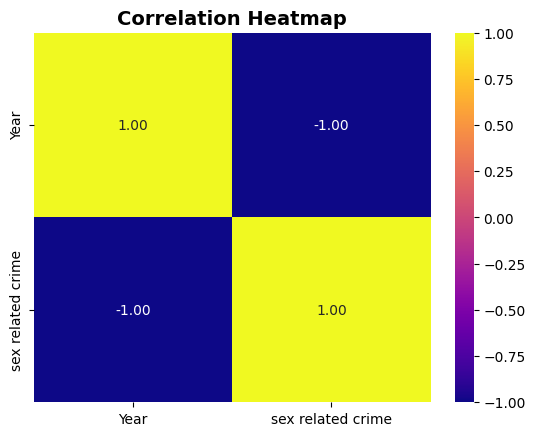

In [14]:
sex_offense_df = ck[ck['Primary Type'] == 'SEX OFFENSE']
sex_crime_years = sex_offense_df.groupby(['Year']).size().reset_index(name='sex related crime')
correlation_matrix = sex_crime_years.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="plasma", center=0, fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14, weight="bold")
plt.show()

<h1>Insight 1</h1>
<hr>
<p><i>Sex-related crimes were way higher back in the <b>early 2000s (2000–2003)</b>, then they dropped pretty steadily through the <b>2010s</b>. Around <b>2018</b>, though, the numbers started climbing back up, with <b>2019 and 2023</b> being the highest spikes in recent years.</i></p>

<h1>Insight 2</h1>
<hr>
<p> On the other hand 2020 looks super low, but that’s likely because of COVID lockdowns — less movement and maybe less reporting. We’ve made progress since the early 2000s, but these crimes are creeping up again lately, so it’s still a serious issue</p>

<h1>Q2. <hr> <i> Which type of crime occurs most frequently at the transport location identified as having the highest risk?</i></h1>

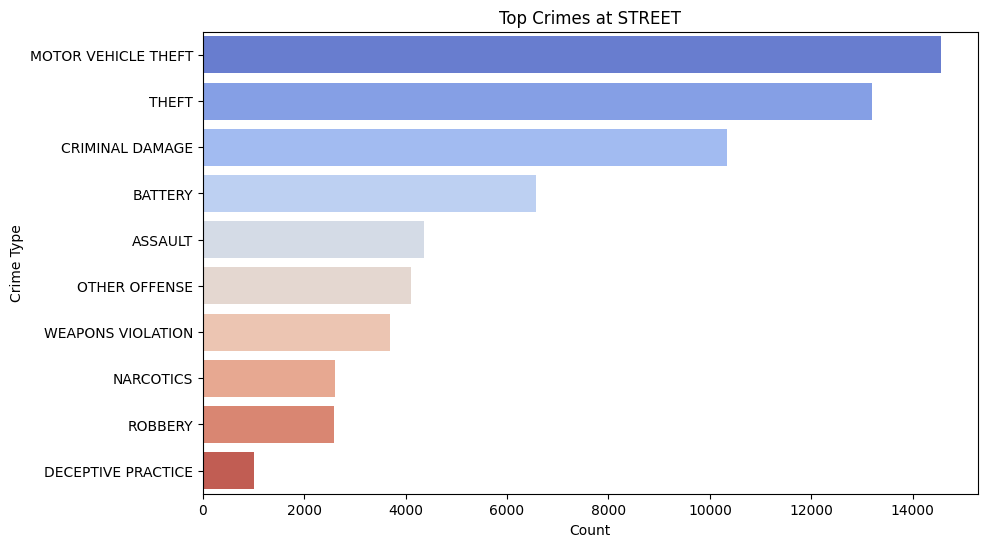

In [15]:
location_counts = ck['Location Description'].value_counts().reset_index()
location_counts.columns = ['Location', 'Count']
transport_df = ck.copy()
top_location = location_counts.iloc[0]['Location']
top_loc_data = transport_df[transport_df['Location Description'] == top_location]

top_loc_crimes = top_loc_data['Primary Type'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_loc_crimes.values, y=top_loc_crimes.index, palette="coolwarm")
plt.title(f"Top Crimes at {top_location}")
plt.xlabel("Count")
plt.ylabel("Crime Type")
plt.show()

<h1>Insight 3</h1>
<hr>
<p>Streets are especially prone to vehicle-related crimes, and that fits with what we see happening across the city. Places like parking lots, dimly lit corners, and areas where cars are left unattended tend to attract trouble. It’s a reminder that everyday spaces we pass through can carry hidden risks if we’re not careful.</p>

<h1>Q3</h1><hr>
<h1>How high is the arrest rate for the crimes near plublic transportions?</h1>

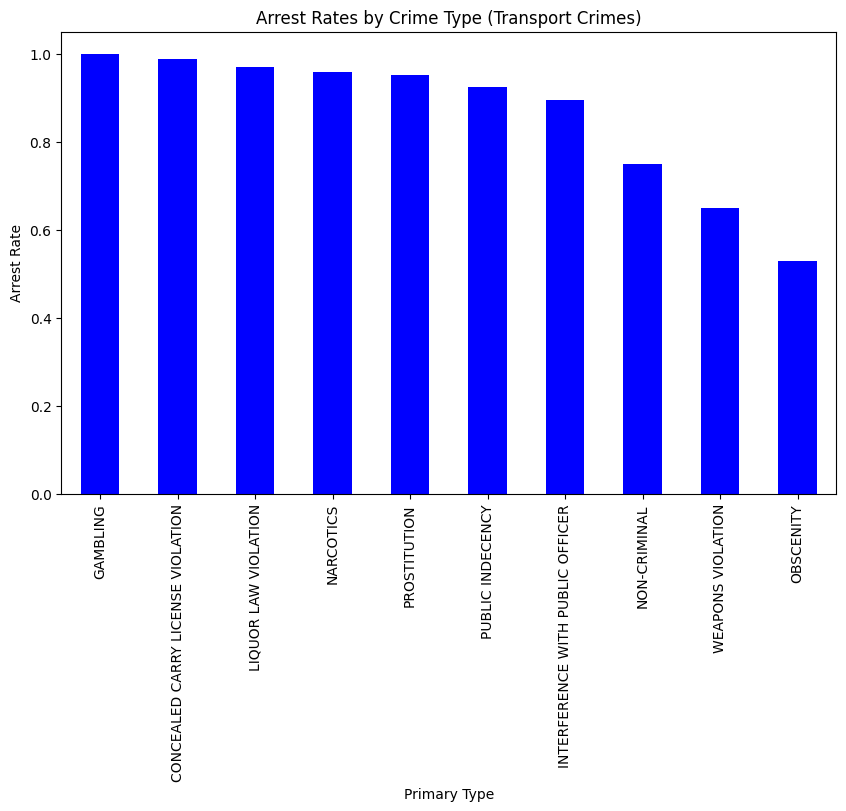

In [16]:
arrest_rate = transport_df['Arrest'].mean()
arrest_by_type = transport_df.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
arrest_by_type.plot(kind="bar", color="blue")
plt.title("Arrest Rates by Crime Type (Transport Crimes)")
plt.ylabel("Arrest Rate")
plt.show()

<h1>Insight 4</h1>
<hr>
<p>As we can see gambling is slightly higher than other crimes like Liquor law violations and concealed carry license violation. this means that this crimes were the highets because they were the one that are easy to break.</p>


<h1>Insight 5</h1>
<hr>
<p>On the other hand obscenity has the lowest crime rate maybe because some of this cases areignored and not reported.</p>

<h1>Q4</h1> <hr>
<h1>Which specific transport-related location has the highest crime count?</h1>

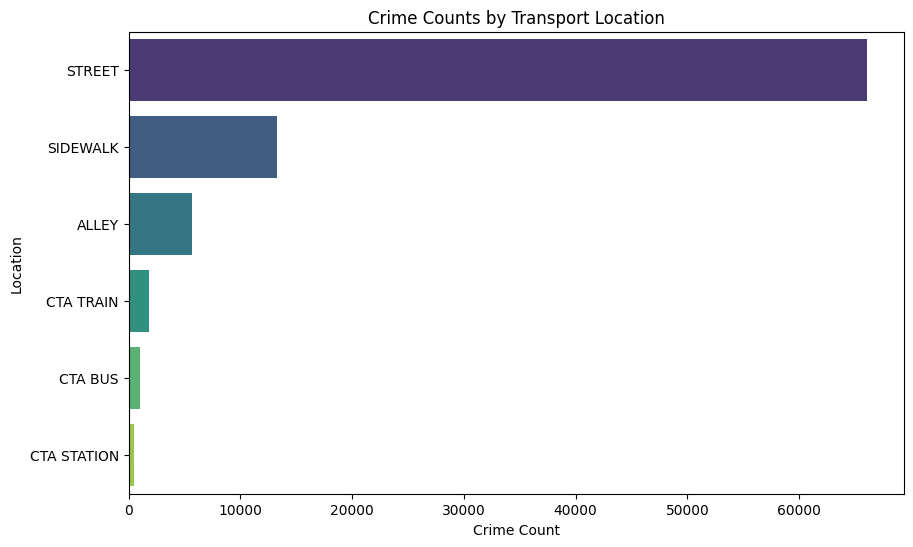

In [17]:
transport_locs = ["STREET", "SIDEWALK", "ALLEY", "CTA STATION", "CTA TRAIN", "CTA BUS"]
transport_df = ck[ck['Location Description'].isin(transport_locs)]

location_counts = transport_df['Location Description'].value_counts().reset_index()
location_counts.columns = ['Location', 'Crime Count']

plt.figure(figsize=(10,6))
sns.barplot(x='Crime Count', y='Location', data=location_counts, palette="viridis")
plt.title("Crime Counts by Transport Location")
plt.show()

<h1>insight 6</h1>
<hr>
<p>The section of street commited crimes dominated thhe crime counts by transport locatins, probably because there were less security personnels along the streets.</p>

<h1>insight 7</h1>
<hr>
<p>Majority of the transportation related crime didnt occured inside the CTA areas. surely because therewere enough securty personnels thatcan be easily seen in those areas. </p>

<h1>insight 8</h1>
<hr>
<p>This result shows that they should add more security to locations or areas like streets and alleys.</p>

<h1>Q5
    <hr>How do crime rates fluctuate month by month in the ward with the highest overall crime levels?</h1>


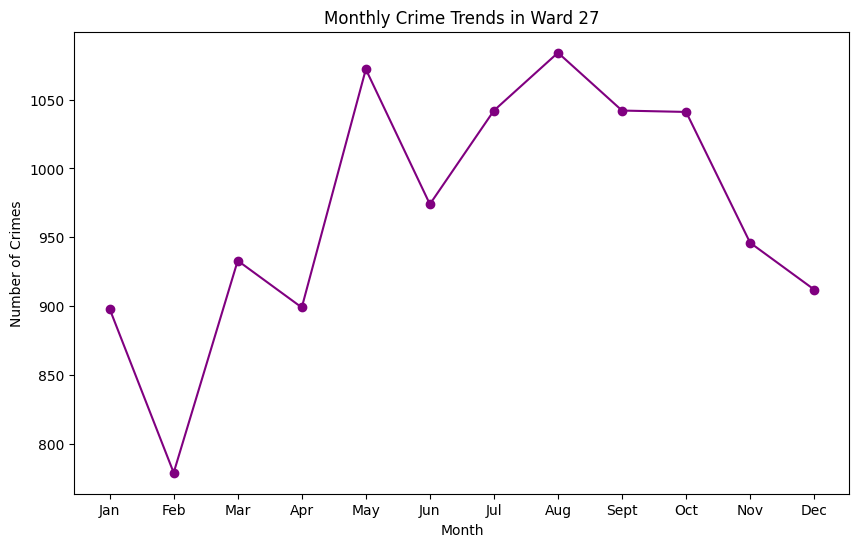

In [19]:
ward_counts = ck['Ward'].value_counts().head(10)
ward_df = ward_counts.reset_index()
highest_ward = ward_df.iloc[0]['Ward']
ward_data = ck[ck['Ward'] == highest_ward]

ward_data['Month'] = pd.to_datetime(ward_data['Date']).dt.month
ward_month = ward_data['Month'].value_counts().sort_index()


plt.figure(figsize=(10,6))
ward_month.plot(kind="line", marker="o", color="purple")
plt.title(f"Monthly Crime Trends in Ward {highest_ward}")
plt.xlabel("Month")
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.ylabel("Number of Crimes")
plt.show()

<h1>insight 9</h1>
<hr>
<p>Crime levels in Ward 27 rise steadily from February, reaching noticeable peaks in May and July. This mid-year surge could be linked to increased public activity, warmer weather, or seasonal patterns that influence both opportunity and reporting
</p>

<h1>insight 10</h1>
<hr>
<p>After July, crime numbers gradually taper off, with a steep drop in November and December. This decline might reflect reduced outdoor movement, holiday-related policing efforts, or shifts in community behavior as the year closes
</p>

<h1>Q6
    <hr>Top 10 community with PROSTITUTION is the highest crime.</h1>


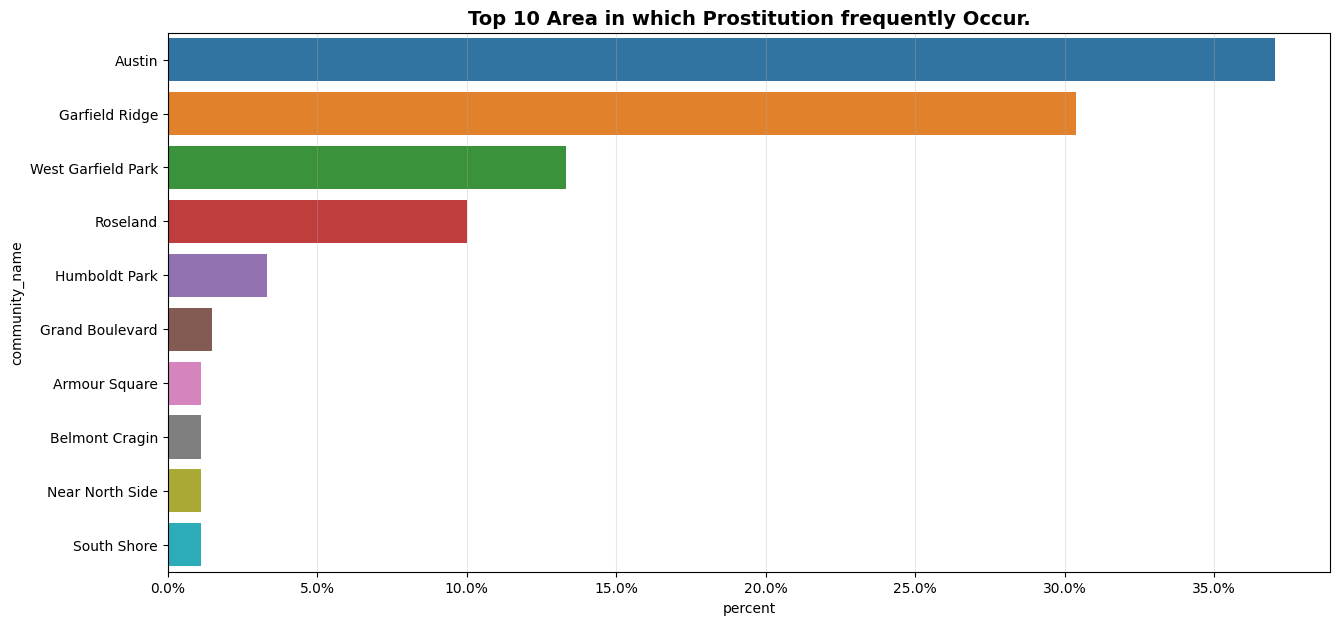

In [20]:
prostitute_df = ck[ck['Primary Type'] == 'PROSTITUTION']
prostiture_datas = prostitute_df.groupby('community_name').size().reset_index(name='prostitution_crime').nlargest(10, 'prostitution_crime')
prostiture_datas['percent'] = (prostiture_datas['prostitution_crime'] / prostiture_datas['prostitution_crime'].sum()) * 100 # math to get percent
sns.barplot(data = prostiture_datas, y = 'community_name', x = 'percent', orient = 'h', hue = 'community_name')
plt.gcf().set_size_inches(15,7)
plt.title("Top 10 Area in which Prostitution frequently Occur.", fontsize=14, weight="bold")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%')) # format to % for better understanding of numbers
plt.grid(axis='x', alpha=0.3)
plt.show()

<h1>Insight 11</h1><hr>
<p>
Austin has the highest number of reported prostitution cases—about one in five. It’s a big, busy area with major roads and transit, plus some spots that aren’t closely watched, which might make it easier for things to go unnoticed.</p>

<h1>Insight 12</h1><hr>
<p>
Almost 20% of cases are listed under “Unknown,” which doesn’t mean they didn’t happen—just that the exact location wasn’t recorded. That could be due to people moving around, gaps in reporting, or errors in the data, hinting that the real numbers might be even higher.</p>


<h1>Insight 13</h1><hr>
<p>
Neighborhoods like Near North Side, West Garfield Park, and a few others show concentrated activity—places with nightlife, foot traffic, or less oversight. While Austin leads, prostitution isn’t isolated to one area. It tends to show up where people can blend in or stay under the radar, making it a broader city issue with specific pressure points
</p>

<h1>Q7<hr>Which types of crime in Chicago are mostly happening between strangers — and which ones are more likely to happen within families or households?</h1>

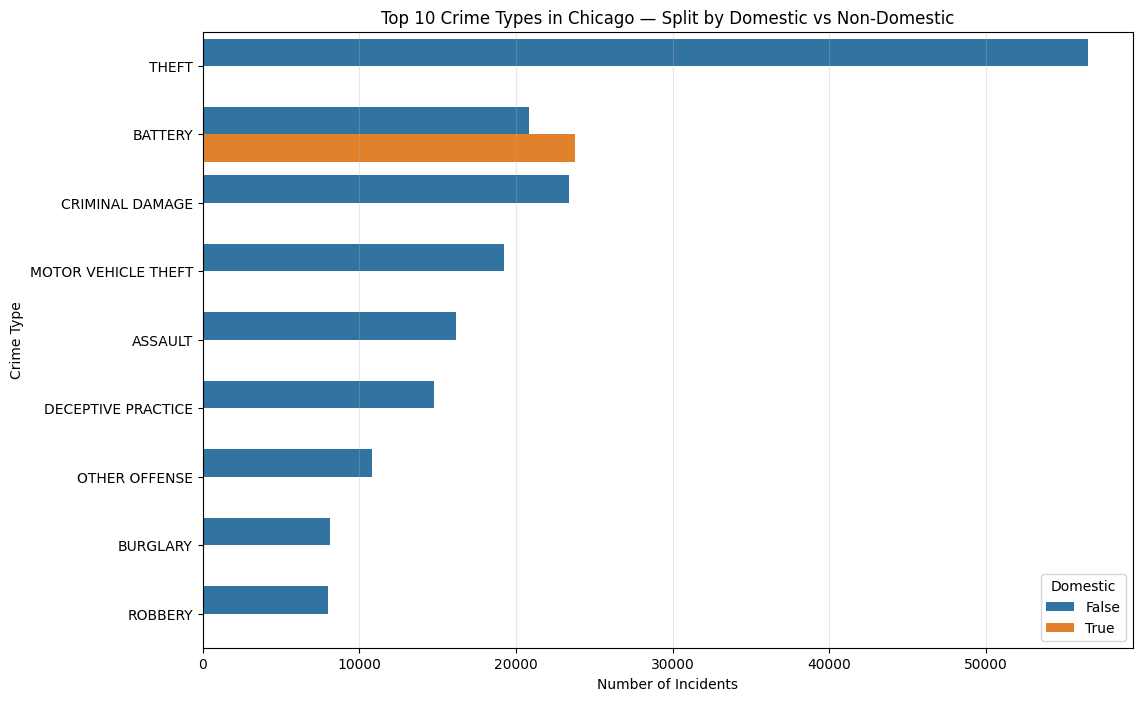

In [21]:
top_crimes = ck.groupby(['Primary Type', 'Domestic']).size().reset_index(name='count').nlargest(10, 'count')
top_crimes
plt.figure(figsize=(12, 8))
sns.barplot(data=top_crimes, y='Primary Type', x='count', orient='h', hue = 'Domestic')
plt.title('Top 10 Crime Types in Chicago — Split by Domestic vs Non-Domestic')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Type')
plt.grid(axis='x', alpha=0.3)
plt.show()

<h1>Insigh 14</h1>
<hr>
<p>Battery and assault show up a lot in domestic situations, meaning many of these incidents happen between people who know each other—often behind closed doors. It’s a reminder that not all violence happens out in public.</p>

<h1>Insight 16 </h1>
<hr>
<p>Crimes like theft, car break-ins, and damage to property mostly happen outside the home—in streets, stores, or parking lots. These are the kinds of crimes that affect everyday city life and public spaces.</p>

<h1>Insight 17</h1>
<hr>
<p>Even crimes like fraud or burglary sometimes happen in domestic settings. That shows how complex domestic crime can be—it’s not just about violence, but also trust, access, and vulnerability within relationships.</p>

<h1>Q8</h1>
<hr>
<h1>Which ward has logged the most total crime in Grand Boulevard over the course of its term in office?</h1>
<h3>Grand Boulevard Analysis</h3>
<hr>
<br>
<img src='https://camo.githubusercontent.com/37e56e2fc1618d0ad440789534074a792bacc8468d26b46cf3900fed0f570772/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f322f32302f32303037303531315f4861726f6c645f57617368696e67746f6e5f43756c7475616c5f43656e7465722e4a5047'>

In [ ]:
gb_df = ck[ck['community_name'] == 'Grand Boulevard']

In [ ]:
most_crime = gb_df.groupby(['ward_rep']).size().reset_index(name='crime')
most_crime['crime_pct'] = (most_crime['crime'] / most_crime['crime'].sum()) * 100 
plt.grid(axis='y', alpha=0.3)
sns.barplot(data = most_crime, x = 'ward_rep', y = 'crime_pct', hue = 'ward_rep')
plt.show()


<h1>Insight 18</h1>
<hr>
<p> Most of the crime in Grand Boulevard—about 70%—is happening in Pat Dowell’s ward. That’s a huge chunk compared to Lamont J. Robinson’s, which accounts for around a quarter, and Jeanette B. Taylor’s, which barely registers. It’s clear that Pat Dowell’s area is where the bulk of the issues are showing up. </p>


<h1>Insight 19</h1>
<hr>
<p>With so much of the crime concentrated in one ward, it makes sense to focus attention and resources there. If we want to make a real impact, starting where the problems are most intense could help the whole community feel safer.</p>

<h1>Q9</h1>
<hr>
<h1>Which District Area has the most recorded crime?</h1>

In [23]:
area_no_uknown = ck[ck['community_name'] != 'Unknown']

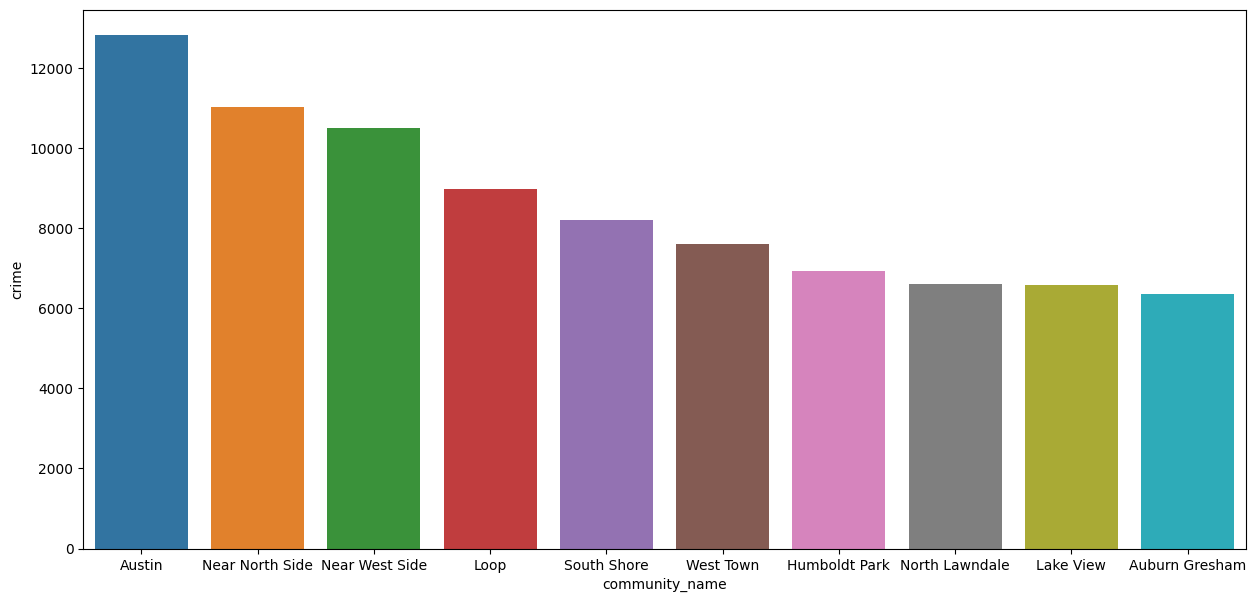

In [24]:
areas_with_high_crime = area_no_uknown.groupby('community_name').size().reset_index(name='crime').nlargest(10, 'crime')
areas_with_high_crime
sns.barplot(data = areas_with_high_crime, x = 'community_name', y = 'crime', hue = 'community_name')
plt.gcf().set_size_inches(15,7)
plt.show()

<h1>Insight 20</h1>
<hr>
<p>Austin stands out with the highest number of reported crimes—it’s clearly facing more challenges than other areas. That could be tied to its size, population, or deeper systemic issues. Either way, it’s a signal that Austin needs extra attention, support, and resources to help ease the pressure on the community.</p>

<h1>Insight 21</h1>
<hr>
<p>While places like Near North Side and Near West Side also show high numbers, others—like Auburn Gresham—have much lower crime rates. This uneven spread tells us that each neighborhood has its own story, and solutions need to be tailored, not one-size-fits-all. Some areas need urgent help, while others might benefit more from prevention and community-building.</p>

<h1>Q10
    <hr>Which year has the most recorded crimes in Austin?</h1>

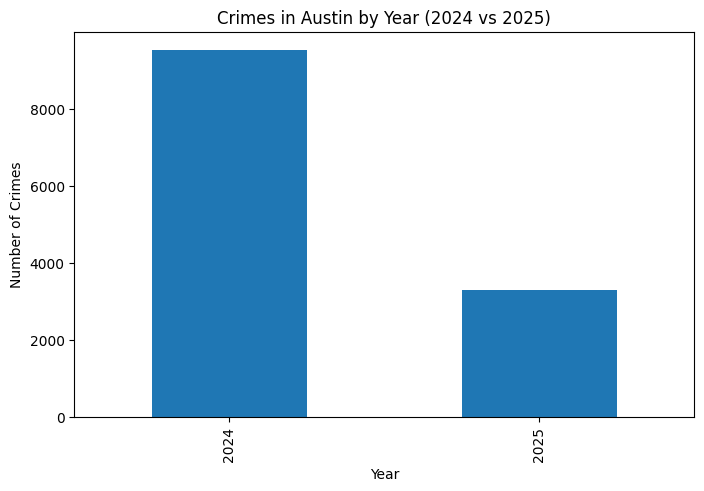

In [27]:
comm25_crimes = ck[ck["Community Area"] == 25]
comm25_primary = comm25_crimes["Primary Type"].value_counts()
comm25_crimes["Year"].value_counts().sort_index().plot(kind="bar", figsize=(8,5))
plt.title("Crimes in Austin by Year (2024 vs 2025)")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.show()

<h1>Insight 22</h1>
<hr>
<p>Based on the result we could say that during 2024 there is a high rate or criminal counts durinng the year 2024.</p>

<h1>Q11 <hr>How much is the gap between violent and non-violent crime in Austin?</h1>

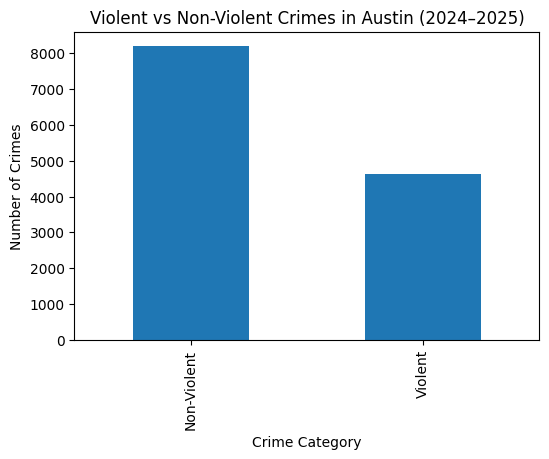

In [29]:
violent_types = ["BATTERY", "ASSAULT", "HOMICIDE", "CRIM SEXUAL ASSAULT", "ROBBERY"]
comm25_crimes["Crime Category"] = np.where(comm25_crimes["Primary Type"].isin(violent_types),"Violent", "Non-Violent")
comm25_crimes["Crime Category"].value_counts().plot(kind="bar", figsize=(6,4))
plt.title("Violent vs Non-Violent Crimes in Austin (2024–2025)")
plt.xlabel("Crime Category")
plt.ylabel("Number of Crimes")
plt.show()

<h1>Insight 23</h1>
<p>In Austin, non-violent crimes happen almost twice as often as violent ones. So while serious offenses like assault or robbery are still a concern, most of what’s being reported involves things like theft, property damage, or other lower-risk incidents. It paints a picture of a community dealing more with everyday disruptions than constant danger—but it’s still a lot to handle.
</p>

<h1>Q12<hr>Do Theft and Battery show seasonal/monthly trends?</h1>

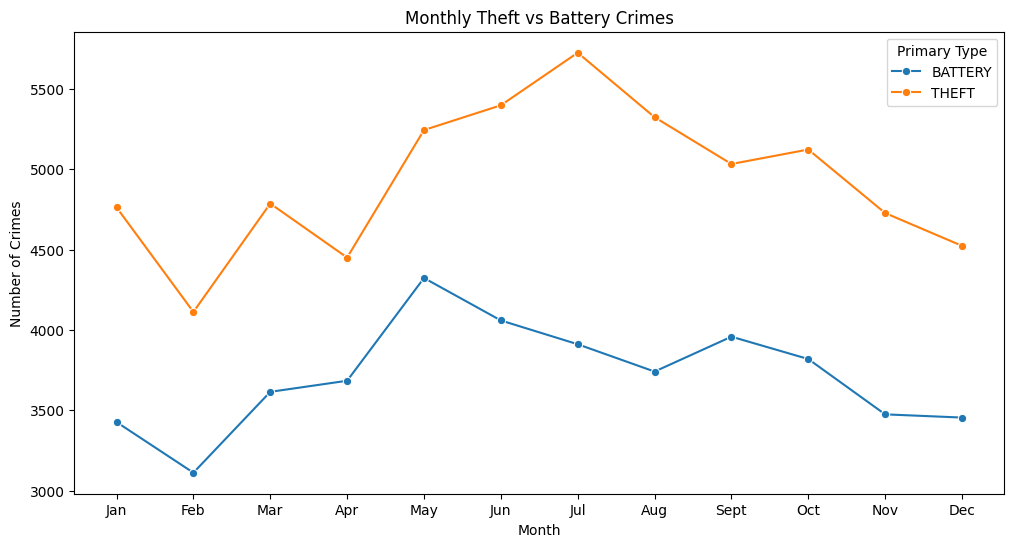

In [31]:

theft_battery = ck[ck["Primary Type"].isin(["THEFT","BATTERY"])]
monthly_tb = theft_battery.groupby(["Month","Primary Type"]).size().reset_index(name="Counts")

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_tb, x="Month", y="Counts", hue="Primary Type", marker="o")
plt.title("Monthly Theft vs Battery Crimes")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.show()

<h1>Insight 24</h1>
<p>Battery cases rise steadily until May, then drop off—likely tied to seasonal shifts in public activity.</p>

<h1>Insght 25</h1>
<p>Theft jumps around month to month, peaking in June, suggesting it's influenced by short-term events or conditions.</p>